**Image Segmentation**


Deep Learning model will try to classify each pixel of the image instead of the whole image. 

+ The deep learning model takes the input image.
+ Then based on the classes it has been trained on, it will try to classify each pixel into one class.
+ The output is then color coded so that we can easily distinguish one class from another.

For example, model will classify all the pixels making up the dog into one class. At the same time, it will classify all the pixels making up the cat into another class. 

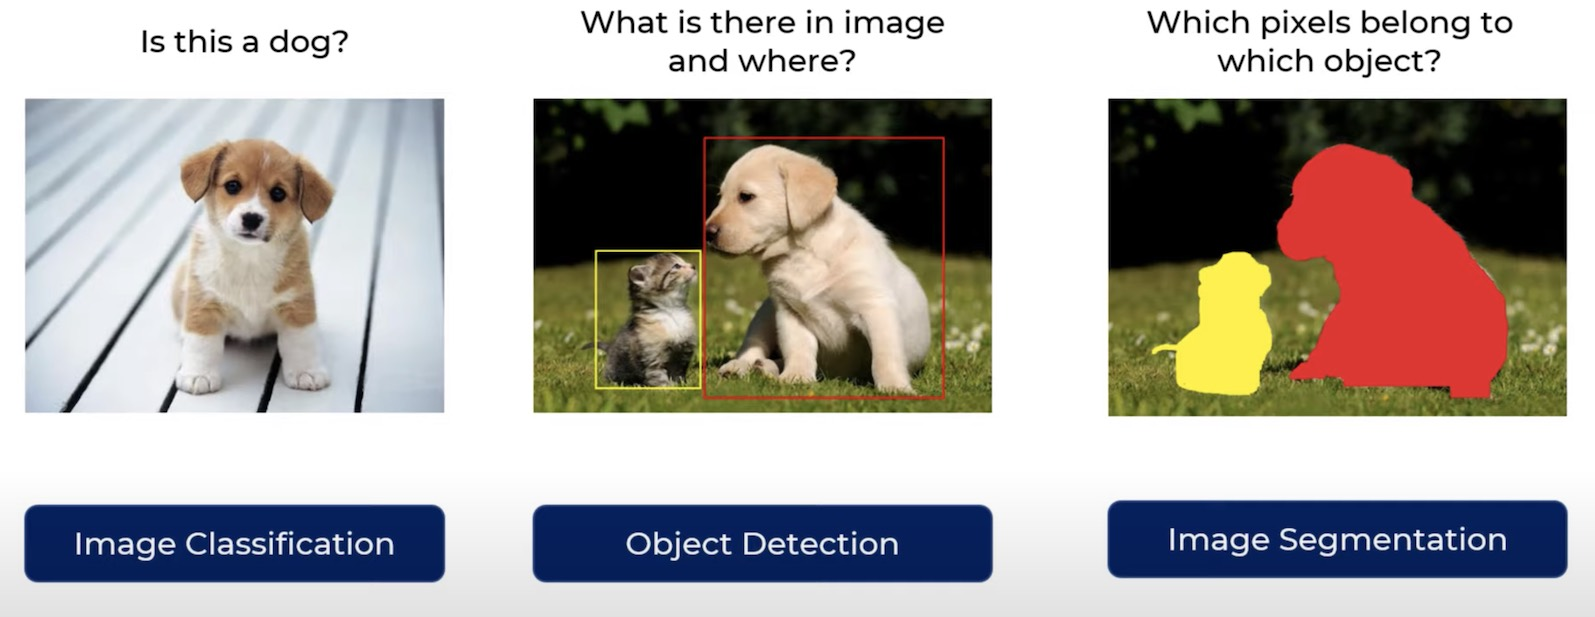

**Types of Image Segmentation**

1. Semantic segmentation
2. Instance segmentation

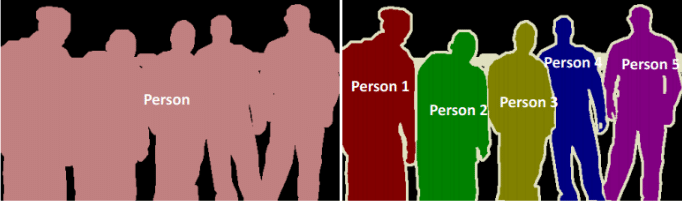

**Semantic segmentation**

In semantic segmentation, we classify the objects belonging to the same class in the image with a single label. When we visualize the output from the deep learning model, all the objects belonging to the same class are color coded with the same color.

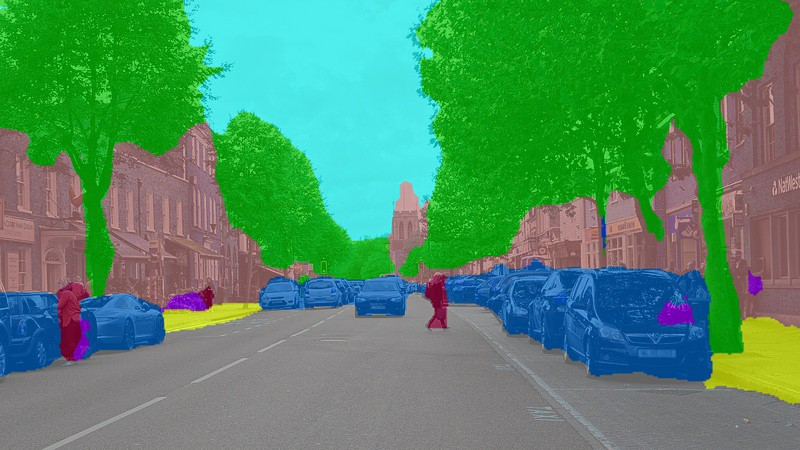

**Instance segmentation**

Instance segmentation is a combination of segmentation and object detection. In instance segmentation, we first detect an object in an image, then we apply a color coded mask around that object and most probably, the color of each mask is different even if two objects belong to the same class.

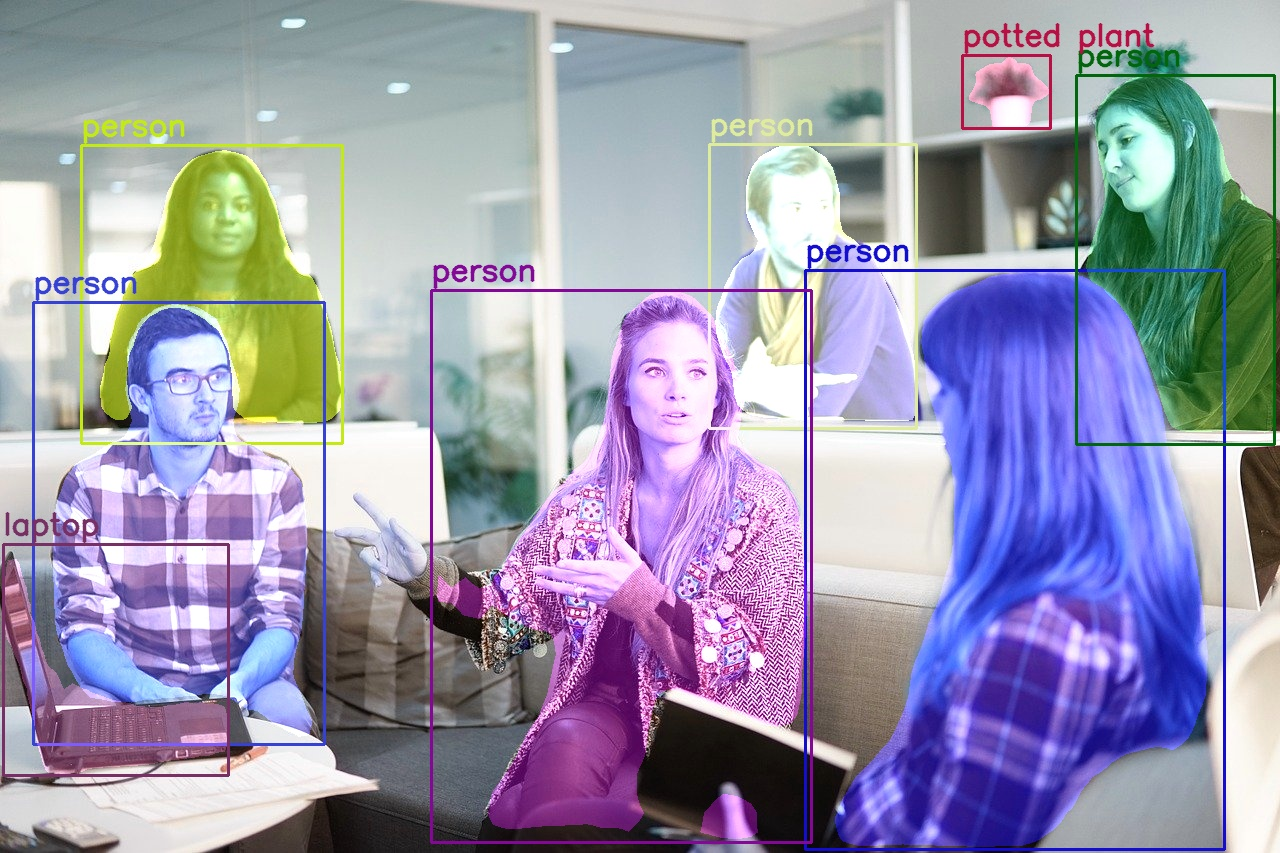

**Evaluation Metrics for Image Segmentation in Deep Learning**

Suppose that there are K + 1 classes in an image where K is the number of all the object classes, and 1 is the background class.

+ Pixel Accuracy

Pixel accuracy is a simple metric, simply computing a ratio between the amount of properly classified pixels and the total number of them.

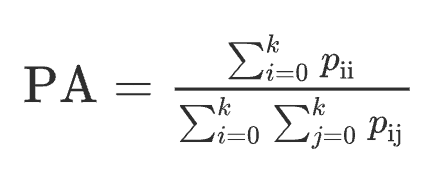

+ Mean Pixel Accuracy

Mean pixel accuracy a slightly improved pixel accuracy in which the ratio of correct pixels is computed in a per-class basis and then averaged over the total number of classes.

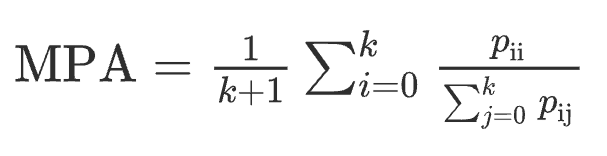

+ Intersection over Union

IoU is used for both object detection and image segmentation. It is the fraction of area of intersection of the predicted segmentation of map and the ground truth map, to the area of union of predicted and ground truth segmentation maps.

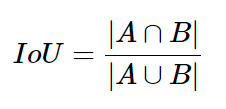

**Mask-RCNN for Instance Segmentation**


Mask-RCNN is a combination of the very famous Faster-RCNN deep learning object detector and image segmentation which further gives masks. RCNN, stands for Region-Based Convolutional Neural Network


Mask-RCNN detects each object present in an image,  <br> gets its bounding boxes,  <br> classifies the object inside the bounding box,  <br> and masks it with a unique color.


**Region-Based Convolutional Neural Network**

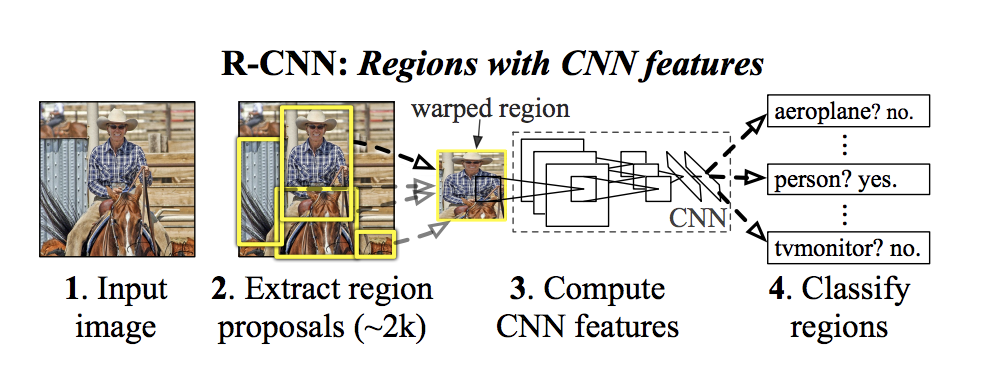

**Mask-RCNN Overview**

Mask RCNN model is divided into two parts:

1. Region proposal network (RPN): this first stage scans the image and generates proposals(areas likely to contain an object)
2. Second stage classifies the proposals and generates bounding boxes and masks.

In [3]:
!nvidia-smi

Wed Aug 24 15:33:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Install required Libraries**

In [4]:
!pip install tensorflow-gpu==1.15.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410.9 MB 33 kB/s 
     |████████████████████████████████| 50 kB 4.8 MB/s 
     |████████████████████████████████| 3.8 MB 50.9 MB/s 
     |████████████████████████████████| 503 kB 67.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=683abc0358c3d9b85347555eb49634876fbf28b8b0de24c7ba7c31cf44c5e8f7
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [5]:
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 24.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.3.1 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 1.15.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorflow-estimator<2.9,>=2.8, but you have tensorflow-estimator 1.15.1 which is incompatible.


In [6]:
import keras

Using TensorFlow backend.


In [7]:
import tensorflow as tf
tf.version.VERSION

'1.15.2'

In [8]:
!pip install --upgrade h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 32.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.3.1 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 1.15.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorflow-estimator<2.9,>=2.8, but you have tensorflow-estimator 1.15.1 which is incompatible.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append("/content/drive/MyDrive/CV Tasks/RCNN_Training/")

In [3]:
cd /content/drive/MyDrive/CV Tasks/RCNN_Training/

/content/drive/MyDrive/CV Tasks/RCNN_Training


In [4]:
!ls

 annotations.json      Dataset.zip  'Test Images'
 BSEF19M031_A3.ipynb   Mask_RCNN


In [ ]:
!git clone https://github.com/AdeelaIslam/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [5]:
sys.path.append("/content/drive/MyDrive/CV Tasks/RCNN_Training/Mask_RCNN/demo")

In [6]:
from train_mask_rcnn_demo import *
%matplotlib inline

VERS 0.2


Using TensorFlow backend.


**Load Datset**

In [7]:
# Extract Images
images_path = "Dataset.zip"
annotations_path = "annotations.json"

extract_images(images_path, "/dataset")

Extracted: 20 images


In [8]:
dataset_train = load_image_dataset(annotations_path, "/dataset", "train")
dataset_val = load_image_dataset(annotations_path, "/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  annotations.json
Annotation json path:  annotations.json
Train: 18
Validation: 2
Classes: 2


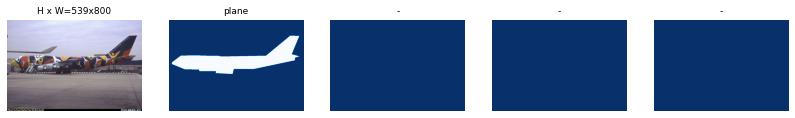

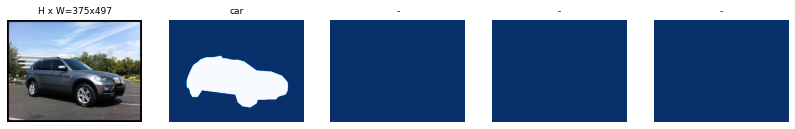

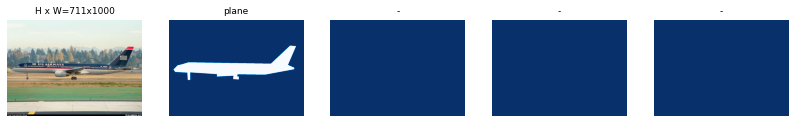

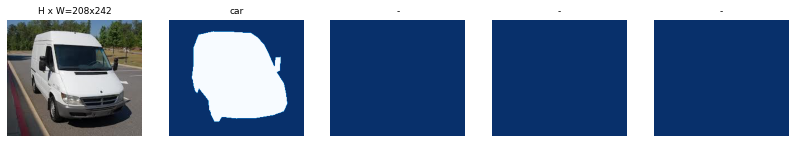

In [9]:
# Load image samples
display_image_samples(dataset_train)

**Train Mask_RCNN**

In [10]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


/content/drive/MyDrive/CV Tasks/RCNN_Training/Mask_RCNN/mask_rcnn_coco.h5


In [15]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/CV Tasks/RCNN_Training/Mask_RCNN/logs/object20220824T1537/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4 

Epoch 1/5
500/500 [==============================] - 462s 925ms/step - loss: 0.3146 - val_loss: 0.0802


Epoch 2/5
500/500 [==============================] - 441s 883ms/step - loss: 0.0708 - val_loss: 0.0862
Epoch 3/5
500/500 [==============================] - 449s 897ms/step - loss: 0.0564 - val_loss: 0.0484
Epoch 4/5
500/500 [==============================] - 449s 898ms/step - loss: 0.0432 - val_loss: 0.0396
Epoch 5/5
500/500 [==============================] - 449s 899ms/step - loss: 0.0515 - val_loss: 0.0456


**Testing**

In [16]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Loading weights from  /content/drive/MyDrive/CV Tasks/RCNN_Training/Mask_RCNN/logs/object20220824T1537/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


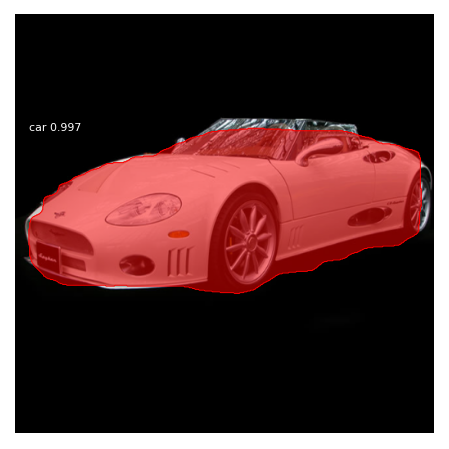

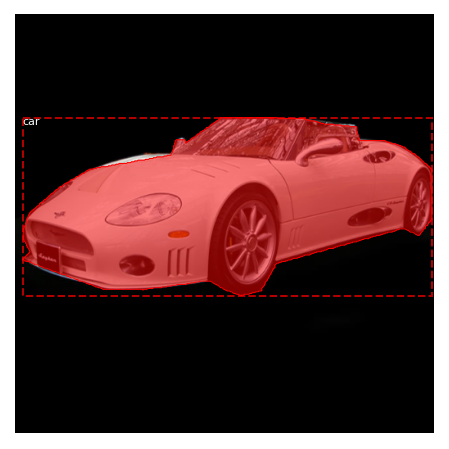

In [17]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

## Testing on Previously saved (pre-trained) Model

In [18]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

In [20]:
# Load Image
img = cv2.imread("/content/cp.jpg")

checkpoint_path = '/content/drive/MyDrive/CV Tasks/RCNN_Training/Mask_RCNN/logs/object20220820T1632/mask_rcnn_object_0005.h5'
test_model, inference_config = load_inference_model(num_classes=class_number, model_path=checkpoint_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]

Loading weights from  /content/drive/MyDrive/CV Tasks/RCNN_Training/Mask_RCNN/logs/object20220820T1632/mask_rcnn_object_0005.h5
Re-starting from epoch 5


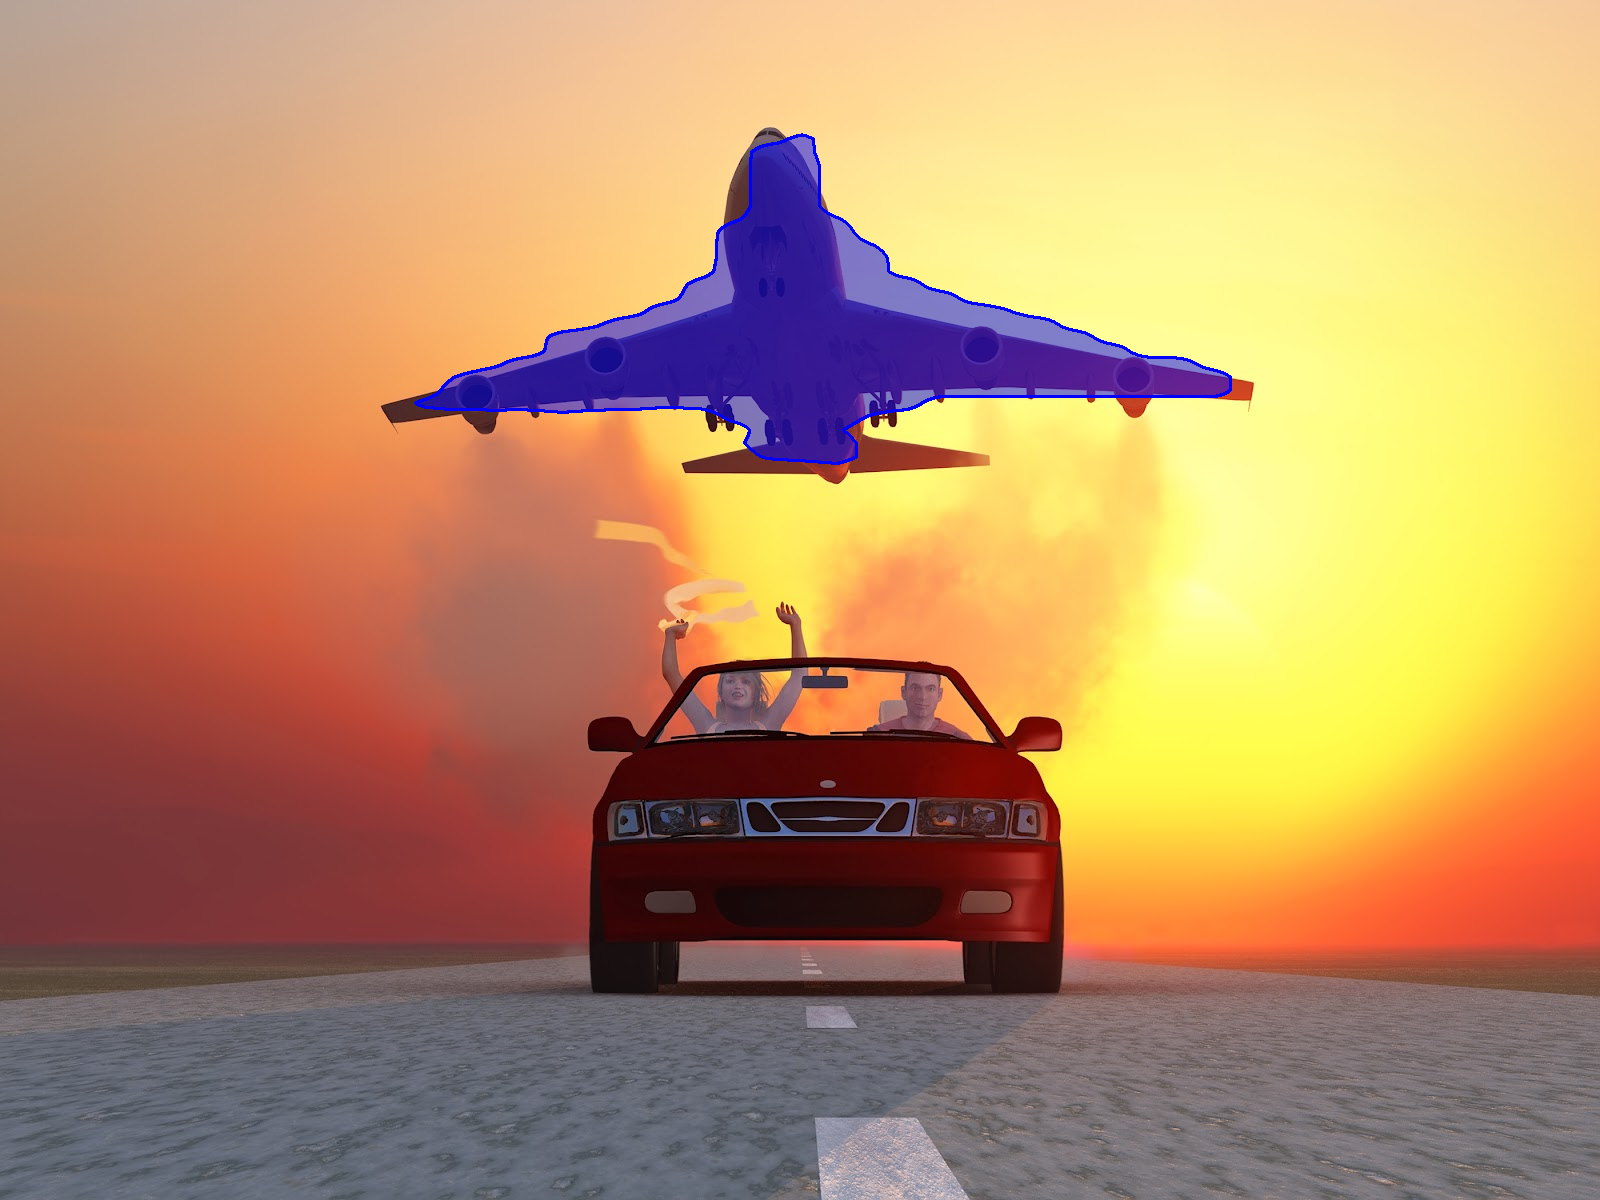

In [21]:
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
colors = random_colors(object_count)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)

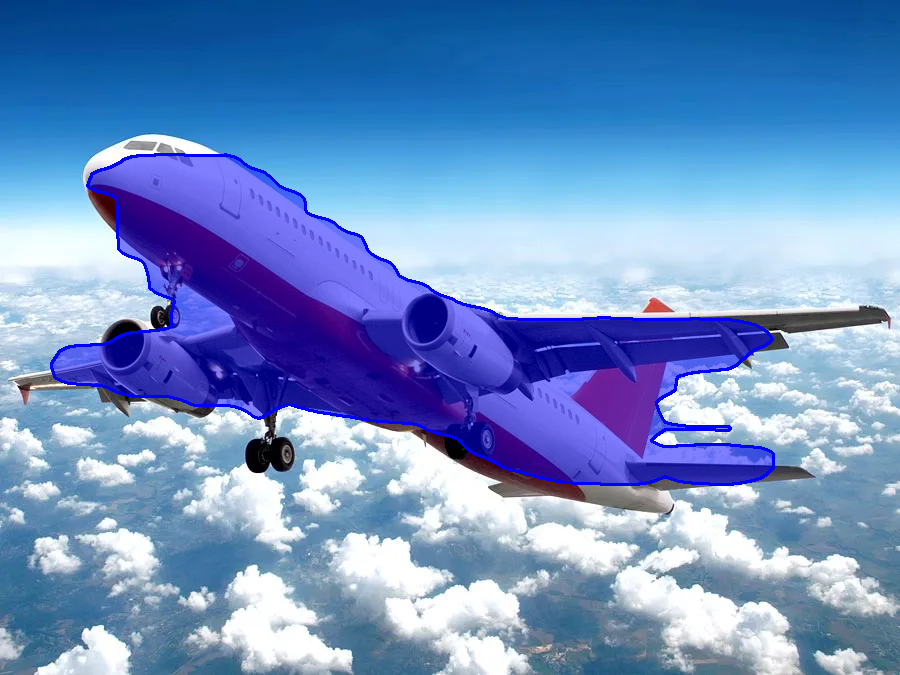

In [ ]:
# Load Image
img = cv2.imread("/content/pic1.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
object_count = len(r["class_ids"])
colors = random_colors(object_count)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
cv2_imshow(img)

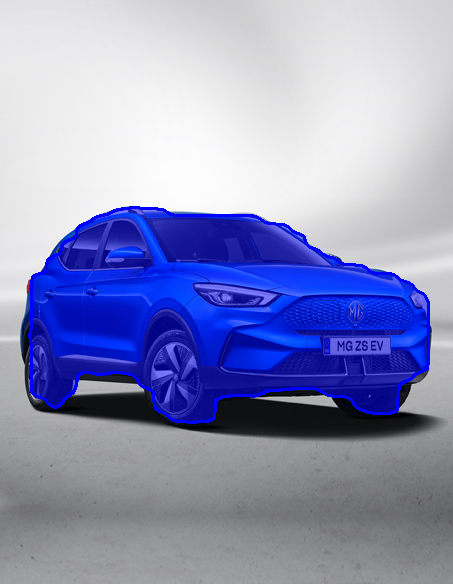

In [ ]:
# Load Image
img = cv2.imread("/content/pic2.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
object_count = len(r["class_ids"])
colors = random_colors(object_count)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
cv2_imshow(img)

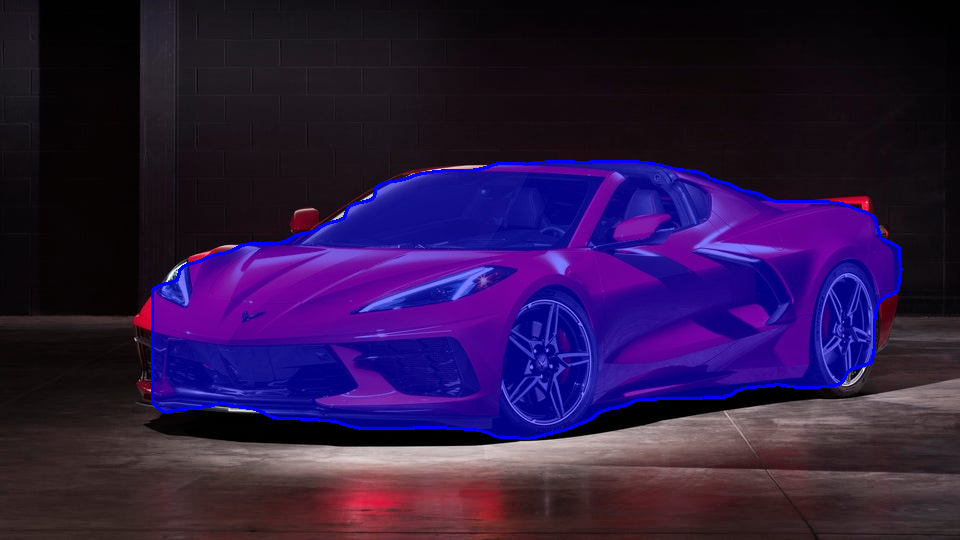

In [ ]:
# Load Image
img = cv2.imread("/content/pic3.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
object_count = len(r["class_ids"])
colors = random_colors(object_count)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
cv2_imshow(img)